In [15]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
# import pylab as pl
import matplotlib.cm as cm
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator


input_shape = (150, 150, 3)
img_width = 150
img_height = 150

# nb_train_samples = 2000
# nb_validation_samples = 1000
batch_size = 16 # 16 ota bhaag ma divide garera images haru pathauxa 
epochs = 2 # number of cycles ma train garney 2 choti back propagation hunxa

train_data_dir = 'dogscats/train/cats'
validation_data_dir = 'dogscats/valid/cats'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255) # each pixel lai 255 ma divide gareko normalization

# Creating our data generator for our training data image augmentation gareko ho
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations euta image lai 12 taal oltai paltai garxa 360/30 360 bhaneko 2d ko angle
      width_shift_range = 0.3,       # randomly applies width shifting kati zoom in zoom out garney 
      height_shift_range = 0.3,      # randomly applies height shifting mathikai
      horizontal_flip = True,        # randomly flips the image flip image lai aaina ma rakheko jasto
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [16]:
# Creating out model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape)) # image ko dimension size ghateko xaina convolution create 64 kernel use garera conv gara image ko size 150 150
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # size ghatxa maxpooling garda 

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))# convolution lai support gareko 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# kernel ko size katiota ghatauney badauney hunxa bhaney kaam classification hunxa praya 128 bata hunxa 

model.add(Flatten())# single dimension ma convert gareko

# aaba neural network ko kaam
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('relu'))

model.add(Dropout(0.5)) # 0.5 bhanda muniko node ko value xa bhaney dropout use garney bich ma dropout garxa
model.add(Dense(1)) # binary image classification ko lagi euta matra value hunxa

model.add(Activation('sigmoid')) # sigmoid use garda dense layer ma euta matra output huna parxa
# model.add(Activation('softmax'))
print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_9 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 activation_10 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                 

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8005 // batch_size,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2023 // batch_size)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Update the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

C:\Users\puzan12\AppData\Local\Temp\ipykernel_17088\2183080090.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/catvsdog/my_mode.h5')

In [ ]:
history.history

{'loss': [0.6980695128440857,
  0.6933598518371582,
  0.6945522427558899,
  0.6932942271232605,
  0.6931549906730652,
  0.6932735443115234,
  0.6930750012397766,
  0.6929255127906799,
  0.6935245990753174,
  0.6932122707366943],
 'accuracy': [0.48875001072883606,
  0.5174999833106995,
  0.47874999046325684,
  0.48374998569488525,
  0.5107731223106384,
  0.4737499952316284,
  0.518750011920929,
  0.5224999785423279,
  0.4737499952316284,
  0.4987500011920929],
 'val_loss': [0.693537712097168,
  0.6887128353118896,
  0.693695604801178,
  0.6931807994842529,
  0.6926711201667786,
  0.6931373476982117,
  0.6933580040931702,
  0.6922562122344971,
  0.6932815909385681,
  0.6934762001037598],
 'val_accuracy': [0.453125,
  0.5364583134651184,
  0.4322916567325592,
  0.4895833432674408,
  0.5677083134651184,
  0.546875,
  0.4791666567325592,
  0.5572916865348816,
  0.4739583432674408,
  0.4479166567325592]}

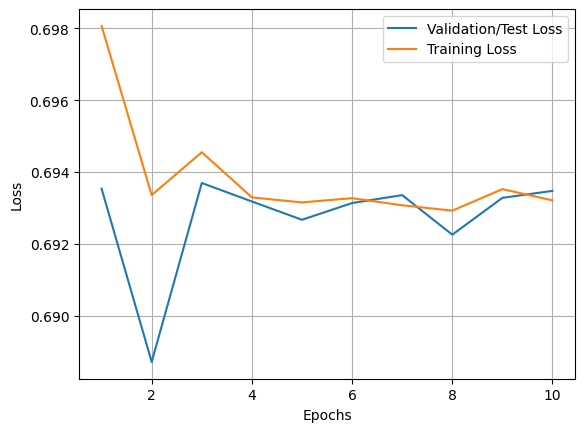

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

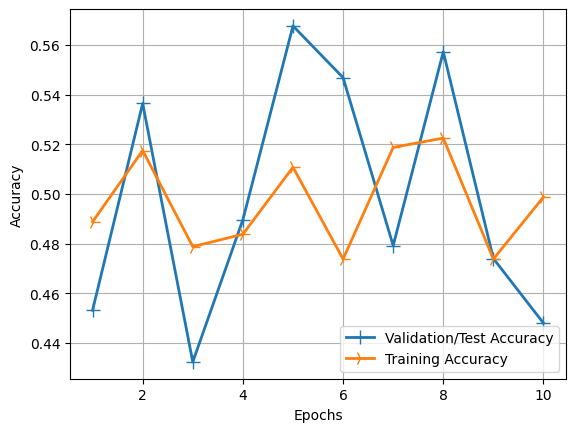

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


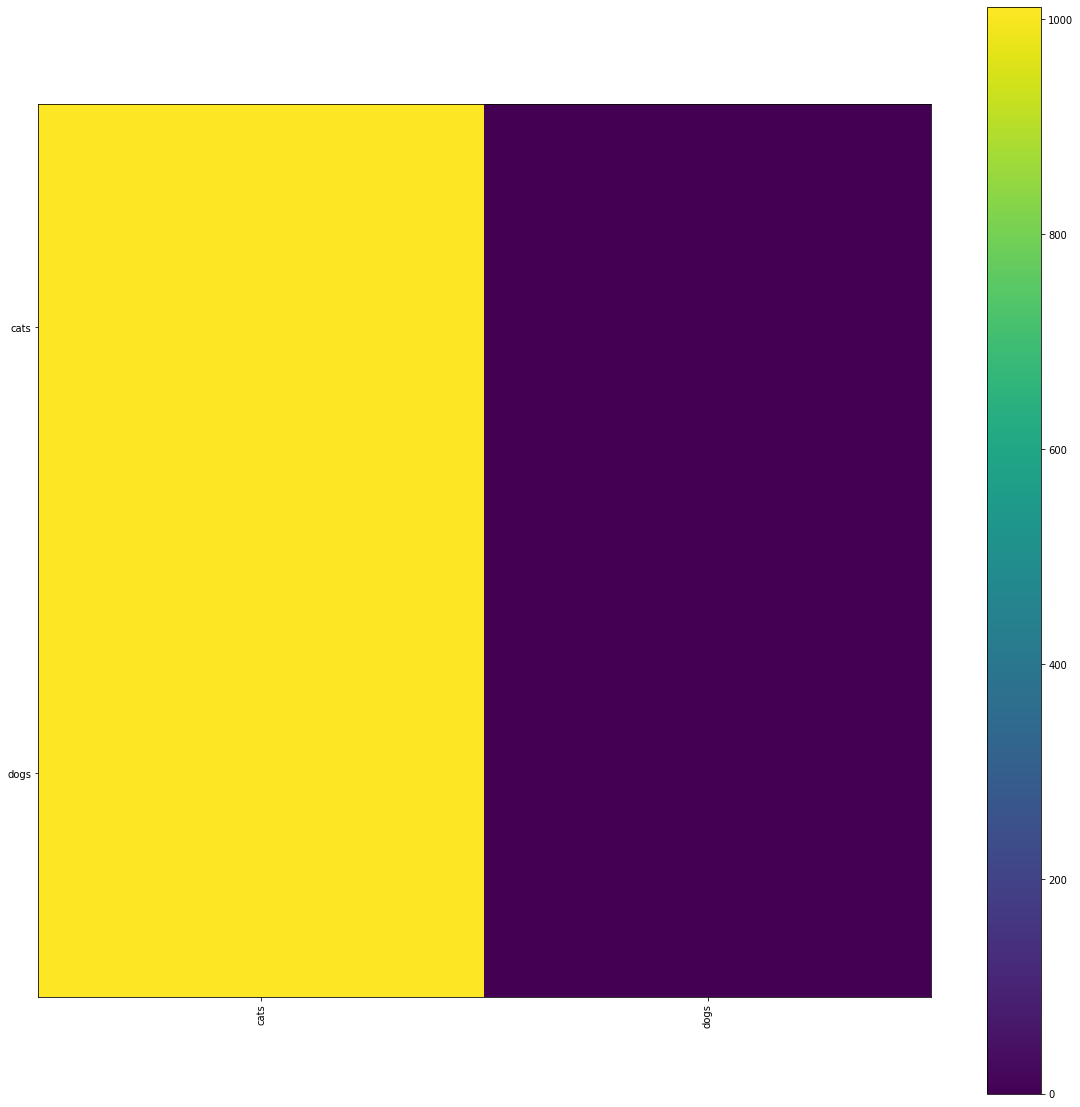

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 8005
nb_validation_samples = 2023

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(cnf_matrix)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

(1, 150, 150, 3)
1/1 [==============================] - 0s 113ms/step
[[0.44862676]]
[[0.44862676]]
this is cat


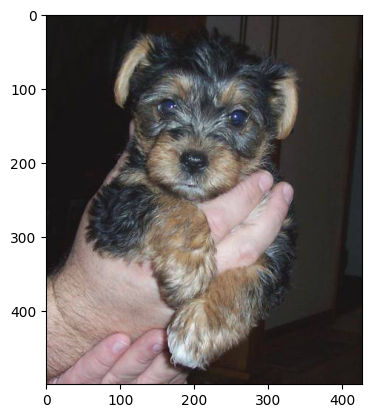

In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = '/content/drive/MyDrive/catvsdog/test_set/test_set/dogs/dog.4002.jpg'
model = models.load_model('/content/drive/MyDrive/catvsdog/my_mode.h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is dog")
else:
  print("this is cat")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)

In [ ]:
image = np.array([[[23,45,67,],
         [23,45,67],
         [34,56,78]]])
image.shape

(1, 3, 3)

In [5]:
import matplotlib.pyplot as plt

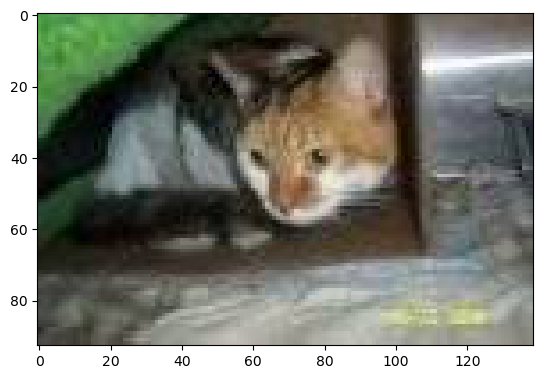

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image using PIL
image_path = 'dogscats/train/cats/cat.48.jpg'
image = Image.open(image_path)

# Display the image using plt.imshow
plt.imshow(image)
plt.show()


In [3]:
import pycuda.driver as cuda

cuda.init()
device = cuda.Device(0)  # Assuming you have one GPU; change the index if needed
print("CUDA Version:", device.compute_capability())


ModuleNotFoundError: No module named 'pycuda'

In [2]:
!pip install pycuda


                                              0.0/1.7 MB ? eta -:--:--
                                              0.0/1.7 MB 1.4 MB/s eta 0:00:02
     -                                       0.1/1.7 MB 787.7 kB/s eta 0:00:03
     ---                                      0.2/1.7 MB 1.1 MB/s eta 0:00:02
     -----                                    0.2/1.7 MB 1.4 MB/s eta 0:00:02
     ----------                               0.4/1.7 MB 2.1 MB/s eta 0:00:01
     ------------                             0.5/1.7 MB 2.2 MB/s eta 0:00:01
     ------------------------                 1.0/1.7 MB 3.8 MB/s eta 0:00:01
     -----------------------------            1.3/1.7 MB 4.0 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparin

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [137 lines of output]
  ***************************************************************
  *** WARNING: nvcc not in path.
  *** May need to set CUDA_INC_DIR for installation to succeed.
  ***************************************************************
  *************************************************************
  *** I have detected that you have not run configure.py.
  *************************************************************
  *** Additionally, no global config files were found.
  *** I will go ahead with the default configuration.
  *** In all likelihood, this will not work out.
  ***
  *** See README_SETUP.txt for more information.
  ***
  *** If the build does fail, just re-run configure.py with the
  *** correct arguments, and then retry. Good luck!
  *************************************************************
  *** HIT Ctrl-C NOW IF THIS IS NOT WHAT YOU WANT
  ***************************************************